In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller  
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

In [2]:
l1=['WMT]'

In [3]:
df1 = pdr.get_data_yahoo(l1, start='2019-01-01',end='2019-12-31')["Adj Close"]
df1

Symbols,AAPL,AMZN,META,GOOGL,IBM,INTC,MSFT,ORCL,WMT
Date,,,,,,,,,
2019-01-02,38.105129,76.956497,135.679993,52.734001,90.588531,42.019058,96.874687,42.296150,87.205612
2019-01-03,34.309589,75.014000,131.740005,51.273499,88.780067,39.707481,93.310860,41.884594,86.757156
2019-01-04,35.774239,78.769501,137.949997,53.903500,92.247604,42.144016,97.650696,43.689808,87.299042
2019-01-07,35.694607,81.475502,138.050003,53.796001,92.900208,42.340363,97.775230,44.381962,88.326721
2019-01-08,36.375065,82.829002,142.529999,54.268501,94.221191,42.608105,98.484161,44.784164,88.943359
...,...,...,...,...,...,...,...,...,...
2019-12-24,69.623238,89.460503,205.119995,67.221497,111.223953,54.346455,153.002075,50.837070,113.917015
2019-12-26,71.004585,93.438499,207.789993,68.123497,111.166260,54.721500,154.256180,50.960732,113.926529
2019-12-27,70.977638,93.489998,208.100006,67.732002,111.462898,54.959351,154.538116,50.856098,113.993248


In [4]:
df1.to_csv("df1_l7.csv")

In [5]:
df1=pd.read_csv("df1_l7.csv",parse_dates=["Date"],index_col=["Date"])
df1
# parse_dates changes date column from string to datetime
# index_col sets the date column as the index 

,AAPL,AMZN,META,GOOGL,IBM,INTC,MSFT,ORCL,WMT
Date,,,,,,,,,
2019-01-02,38.105129,76.956497,135.679993,52.734001,90.588531,42.019058,96.874687,42.296150,87.205612
2019-01-03,34.309589,75.014000,131.740005,51.273499,88.780067,39.707481,93.310860,41.884594,86.757156
2019-01-04,35.774239,78.769501,137.949997,53.903500,92.247604,42.144016,97.650696,43.689808,87.299042
2019-01-07,35.694607,81.475502,138.050003,53.796001,92.900208,42.340363,97.775230,44.381962,88.326721
2019-01-08,36.375065,82.829002,142.529999,54.268501,94.221191,42.608105,98.484161,44.784164,88.943359
...,...,...,...,...,...,...,...,...,...
2019-12-24,69.623238,89.460503,205.119995,67.221497,111.223953,54.346455,153.002075,50.837070,113.917015
2019-12-26,71.004585,93.438499,207.789993,68.123497,111.166260,54.721500,154.256180,50.960732,113.926529
2019-12-27,70.977638,93.489998,208.100006,67.732002,111.462898,54.959351,154.538116,50.856098,113.993248


In [6]:
# log return 
df2=np.log(df1/df1.shift(1)).dropna()
df2

,AAPL,AMZN,META,GOOGL,IBM,INTC,MSFT,ORCL,WMT
Date,,,,,,,,,
2019-01-03,-0.104924,-0.025566,-0.029469,-0.028086,-0.020165,-0.056584,-0.037482,-0.009778,-0.005156
2019-01-04,0.041803,0.048851,0.046061,0.050021,0.038314,0.059553,0.045460,0.042197,0.006227
2019-01-07,-0.002228,0.033777,0.000725,-0.001996,0.007050,0.004648,0.001274,0.015718,0.011703
2019-01-08,0.018884,0.016476,0.031937,0.008745,0.014119,0.006304,0.007224,0.009021,0.006957
2019-01-09,0.016839,0.001713,0.011857,-0.003433,0.007151,0.005640,0.014198,-0.002091,-0.003262
...,...,...,...,...,...,...,...,...,...
2019-12-24,0.000950,-0.002116,-0.005154,-0.004601,-0.004214,0.003035,-0.000191,-0.005040,0.004025
2019-12-26,0.019646,0.043506,0.012933,0.013329,-0.000519,0.006877,0.008163,0.002430,0.000084
2019-12-27,-0.000380,0.000551,0.001491,-0.005763,0.002665,0.004337,0.001826,-0.002055,0.000585


In [7]:
a1=np.array([1/9]*9)
a1

array([0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
       0.11111111, 0.11111111, 0.11111111, 0.11111111])

In [8]:
df2.mean()

AAPL     0.002531
AMZN     0.000728
META     0.001649
GOOGL    0.000952
IBM      0.000790
INTC     0.001054
MSFT     0.001829
ORCL     0.000698
WMT      0.001042
dtype: float64

In [9]:
np.dot(df2.mean(),a1)

0.0012526397104010022

In [10]:
df1=pd.read_csv("edata.csv",parse_dates=["DATE","evntdate"])
df1

FileNotFoundError: [Errno 2] No such file or directory: 'edata.csv'

In [2]:
df1=pd.read_csv("transactions.csv",parse_dates=["date"])
df1

,units,dtdate,date,mon,yr
0,NaN,02JAN2004:08:00:00,2004-01-02,1,2004
1,1940.0,02JAN2004:09:00:00,2004-01-02,1,2004
2,NaN,02JAN2004:10:00:00,2004-01-02,1,2004
3,3147.0,02JAN2004:11:00:00,2004-01-02,1,2004
4,NaN,02JAN2004:12:00:00,2004-01-02,1,2004
...,...,...,...,...,...
10148,NaN,29DEC2006:16:00:00,2006-12-29,12,2006
10149,NaN,29DEC2006:17:00:00,2006-12-29,12,2006
10150,NaN,29DEC2006:18:00:00,2006-12-29,12,2006
10151,NaN,29DEC2006:19:00:00,2006-12-29,12,2006


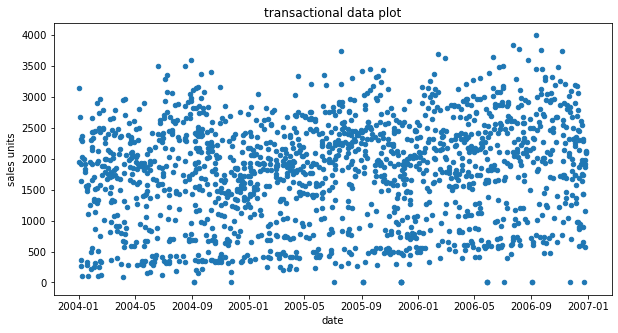

In [3]:
df1.dropna().plot(kind="scatter", x="date",y="units", figsize=(10,5))
plt.xlabel('date')
plt.ylabel('sales units')
plt.title('transactional data plot');

In [6]:
df1["dtdate"]=df1["dtdate"].apply(lambda x: dt.datetime.strptime(x,"%d%b%Y:%H:%M:%S"))
df1

,units,dtdate,date,mon,yr
0,NaN,2004-01-02 08:00:00,2004-01-02,1,2004
1,1940.0,2004-01-02 09:00:00,2004-01-02,1,2004
2,NaN,2004-01-02 10:00:00,2004-01-02,1,2004
3,3147.0,2004-01-02 11:00:00,2004-01-02,1,2004
4,NaN,2004-01-02 12:00:00,2004-01-02,1,2004
...,...,...,...,...,...
10148,NaN,2006-12-29 16:00:00,2006-12-29,12,2006
10149,NaN,2006-12-29 17:00:00,2006-12-29,12,2006
10150,NaN,2006-12-29 18:00:00,2006-12-29,12,2006
10151,NaN,2006-12-29 19:00:00,2006-12-29,12,2006


In [7]:
df1.set_index("date",inplace=True)
df1

,units,dtdate,mon,yr
date,,,,
2004-01-02,NaN,2004-01-02 08:00:00,1,2004
2004-01-02,1940.0,2004-01-02 09:00:00,1,2004
2004-01-02,NaN,2004-01-02 10:00:00,1,2004
2004-01-02,3147.0,2004-01-02 11:00:00,1,2004
2004-01-02,NaN,2004-01-02 12:00:00,1,2004
...,...,...,...,...
2006-12-29,NaN,2006-12-29 16:00:00,12,2006
2006-12-29,NaN,2006-12-29 17:00:00,12,2006
2006-12-29,NaN,2006-12-29 18:00:00,12,2006


In [8]:
# resampling data 
df1["units"].resample("M").mean()

date
2004-01-31    1566.444444
2004-02-29    1608.071429
2004-03-31    1725.093023
2004-04-30    1653.512821
2004-05-31    1424.547619
2004-06-30    1507.309524
2004-07-31    1802.047619
2004-08-31    1978.138889
2004-09-30    1776.459016
2004-10-31    1579.729167
2004-11-30    1404.000000
2004-12-31    1539.229167
2005-01-31    1688.652174
2005-02-28    1655.888889
2005-03-31    1455.500000
2005-04-30    1744.180000
2005-05-31    1784.022727
2005-06-30    1757.347826
2005-07-31    2119.268293
2005-08-31    1880.137255
2005-09-30    1932.075000
2005-10-31    1912.460000
2005-11-30    1473.230769
2005-12-31    1567.092593
2006-01-31    1922.071429
2006-02-28    2168.257143
2006-03-31    1826.644444
2006-04-30    1906.020000
2006-05-31    1725.860000
2006-06-30    2048.456522
2006-07-31    1962.450000
2006-08-31    2087.813953
2006-09-30    1974.974359
2006-10-31    2127.888889
2006-11-30    2090.697674
2006-12-31    1809.060000
Freq: M, Name: units, dtype: float64

In [9]:
df2=df1["units"].resample("M").mean().to_frame()
df2

,units
date,
2004-01-31,1566.444444
2004-02-29,1608.071429
2004-03-31,1725.093023
2004-04-30,1653.512821
2004-05-31,1424.547619
2004-06-30,1507.309524
2004-07-31,1802.047619
2004-08-31,1978.138889
2004-09-30,1776.459016


In [10]:
adfuller(df2)

(-3.1721227138307873,
 0.021656103523732942,
 0,
 35,
 {'1%': -3.6327426647230316,
  '5%': -2.9485102040816327,
  '10%': -2.6130173469387756},
 333.6120475010905)

In [11]:
adfuller(df2)[1]<0.05
# reject the null hypothesis 

True